In [2]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
from matplotlib import pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.cm as cm
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

In [86]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib as mpl
from matplotlib.colors import ListedColormap

In [ ]:
### NOTE:

#The type of building as refered in these datasets as follows:
# 0: 'Irregular'
# 1: 'Regular'
# 2: 'Condominium'
# 3: 'Equipment'
# 4: 'Informal I'
# 5: 'Informal II'
# 6: 'Informal III'
# 7: 'Farms'

#### IMPORT DATASETS

###### YEAR 2005, THERE'S ONE DADATASET FOR EACH TYPE OF GROWTH

In [5]:
dt050 = pd.read_csv('2005_0.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt051 = pd.read_csv('2005_1.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt052 = pd.read_csv('2005_2.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt053 = pd.read_csv('2005_3.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt054 = pd.read_csv('2005_4.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt055 = pd.read_csv('2005_5.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt056 = pd.read_csv('2005_6.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt057 = pd.read_csv('2005_7.txt', sep=',', encoding= 'unicode_escape',engine='python')

dt_05 = pd.concat([dt050, dt051, dt052, dt053, dt054, dt055, dt056, dt057], ignore_index=True)

In [6]:
dt_05.columns = ['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type', 'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min', 'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean', 'hazard_mode']

In [7]:
dt_05.year = dt_05.year.astype(str)
dt_05.dtypes

ID               int64
elev_min       float64
elev_max       float64
elev_mean      float64
elev_std       float64
year            object
type             int64
slope_min      float64
slope_max      float64
slope_mean     float64
slope_std      float64
strata_min     float64
strata_max     float64
strata_mode    float64
hazard_min     float64
hazard_max     float64
hazard_mean    float64
hazard_mode    float64
dtype: object

In [8]:
dt_05.head()

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1562.739990,1587.400024,1576.374558,5.513735,2005,0,4.108963,40.410168,18.132472,9.286643,2.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2,1563.709961,1581.479980,1573.708997,5.468528,2005,0,5.172004,31.888172,19.099157,9.980720,2.0,3.0,3.0,2.0,2.0,2.0,2.0
2,3,1564.900024,1579.900024,1574.156670,4.908079,2005,0,3.867337,32.715496,18.421413,10.894248,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,4,1563.619995,1579.260010,1573.688883,5.271804,2005,0,3.629250,33.640568,18.481216,11.586589,3.0,3.0,3.0,2.0,2.0,2.0,2.0
4,5,1576.300049,1589.439941,1584.661885,3.824182,2005,0,7.075419,29.549379,17.631047,7.334118,3.0,3.0,3.0,2.0,2.0,2.0,2.0


###### YEAR 2010, THERE'S ONE DADATASET FOR EACH TYPE OF GROWTH

In [9]:
dt100 = pd.read_csv('2010_0.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt102 = pd.read_csv('2010_2.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt103 = pd.read_csv('2010_3.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt104 = pd.read_csv('2010_4.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt105 = pd.read_csv('2010_5.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt106 = pd.read_csv('2010_6.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt107 = pd.read_csv('2010_7.txt', sep=',', encoding= 'unicode_escape',engine='python')

dt_10 = pd.concat([dt100, dt102, dt103, dt104, dt105, dt106, dt107], ignore_index=True)

In [10]:
dt_10 = dt_10.drop('MEAN_12', axis=1)

In [11]:
dt_10.columns = ['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type', 'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min', 'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean', 'hazard_mode']

In [12]:
dt_10

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1751.530029,1782.489990,1765.887915,8.307026,2010,0,2.045220,35.569473,17.903139,6.266372,1.0,2.0,1.0,2.0,2.0,2.0,2.0
1,2,1755.780029,1781.290039,1765.922150,6.579056,2010,0,2.320563,25.845322,12.491551,4.920530,1.0,1.0,1.0,2.0,2.0,2.0,2.0
2,3,1751.609985,1756.280029,1754.471680,1.757425,2010,0,0.923908,25.558113,11.367359,8.537780,1.0,1.0,1.0,2.0,2.0,2.0,2.0
3,4,1750.000000,1758.500000,1752.520679,2.582159,2010,0,2.102841,31.095352,16.614588,8.887716,1.0,1.0,1.0,2.0,2.0,2.0,2.0
4,5,1757.869995,1780.060059,1766.796546,5.327781,2010,0,3.169892,23.934156,11.656181,4.995381,1.0,1.0,1.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319264,134630,2040.859985,2065.000000,2058.879990,7.709137,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319265,134631,2041.170044,2065.000000,2057.240546,8.317523,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319266,134632,2040.920044,2065.000000,2056.531989,8.940805,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319267,134633,2058.379883,2058.379883,2058.379883,0.000000,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
dt_10.dtypes

ID               int64
elev_min       float64
elev_max       float64
elev_mean      float64
elev_std       float64
year             int64
type             int64
slope_min      float64
slope_max      float64
slope_mean     float64
slope_std      float64
strata_min     float64
strata_max     float64
strata_mode    float64
hazard_min     float64
hazard_max     float64
hazard_mean    float64
hazard_mode    float64
dtype: object

In [14]:
dt_10.year = dt_10.year.astype(str)

In [15]:
dt_10[-5:-1]

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
319264,134630,2040.859985,2065.000000,2058.879990,7.709137,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319265,134631,2041.170044,2065.000000,2057.240546,8.317523,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319266,134632,2040.920044,2065.000000,2056.531989,8.940805,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
319267,134633,2058.379883,2058.379883,2058.379883,0.000000,2010,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


###### not all datasets are the same lenght and that's why and the end of it some values are NaN

###### YEAR 2015, THERE'S ONE DADATASET FOR EACH TYPE OF GROWTH

In [16]:
dt150 = pd.read_csv('2015_0.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt152 = pd.read_csv('2015_2.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt153 = pd.read_csv('2015_3.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt154 = pd.read_csv('2015_4.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt155 = pd.read_csv('2015_5.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt156 = pd.read_csv('2015_6.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt157 = pd.read_csv('2015_7.txt', sep=',', encoding= 'unicode_escape',engine='python')

dt_15 = pd.concat([dt150, dt152, dt153, dt154, dt155, dt156, dt157], ignore_index=True)

In [17]:
dt_15.head()

,OBJECTID,MIN,MAX,MEAN,STD,year,type,MIN_1,MAX_1,MEAN_1,STD_1,MIN_12,MAX_12,MAJORITY,MIN_12_13,MAX_12_13,MEAN_12,MAJORITY_1
0,1,1734.040039,1754.550049,1745.746860,4.645337,2015,0,0.607790,29.526985,11.590507,6.714906,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,1741.260010,1754.000000,1746.732853,4.864623,2015,0,0.000000,23.478458,9.456220,6.622899,1.0,2.0,1.0,2.0,2.0,2.0,2.0
2,3,1735.869995,1742.260010,1740.168355,2.184281,2015,0,2.381652,21.964149,11.899642,7.677225,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4,1733.010010,1742.060059,1736.455715,3.210753,2015,0,4.491109,24.697634,18.164494,5.978658,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1731.020020,1741.459961,1735.119446,3.368923,2015,0,5.694896,27.711887,17.183430,4.934077,1.0,2.0,2.0,2.0,2.0,2.0,2.0


In [18]:
dt_15.columns = ['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type', 'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min', 'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean', 'hazard_mode']

In [19]:
dt_15.year = dt_15.year.astype(str)
dt_15.head()

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1734.040039,1754.550049,1745.746860,4.645337,2015,0,0.607790,29.526985,11.590507,6.714906,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,1741.260010,1754.000000,1746.732853,4.864623,2015,0,0.000000,23.478458,9.456220,6.622899,1.0,2.0,1.0,2.0,2.0,2.0,2.0
2,3,1735.869995,1742.260010,1740.168355,2.184281,2015,0,2.381652,21.964149,11.899642,7.677225,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4,1733.010010,1742.060059,1736.455715,3.210753,2015,0,4.491109,24.697634,18.164494,5.978658,1.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1731.020020,1741.459961,1735.119446,3.368923,2015,0,5.694896,27.711887,17.183430,4.934077,1.0,2.0,2.0,2.0,2.0,2.0,2.0


###### YEAR 2020, THERE'S ONE DADATASET FOR EACH TYPE OF GROWTH

In [20]:
dt200 = pd.read_csv('2020_0.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt202 = pd.read_csv('2020_2.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt203 = pd.read_csv('2020_3.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt204 = pd.read_csv('2020_4.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt205 = pd.read_csv('2020_5.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt206 = pd.read_csv('2020_6.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt207 = pd.read_csv('2020_7.txt', sep=',', encoding= 'unicode_escape',engine='python')

dt_20 = pd.concat([dt200, dt202, dt203, dt204, dt205, dt206, dt207], ignore_index=True)
dt_20.head()

,OBJECTID,MIN,MAX,MEAN,STD,year,type,MIN_1,MAX_1,MEAN_1,STD_1,MIN_12,MAX_12,MAJORITY,MIN_12_13,MAX_12_13,MEAN_12,MAJORITY_1
0,1,1438.219971,1447.119995,1441.319506,3.253378,2020,0,0.000000,33.441406,7.557919,8.278167,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,1438.219971,1447.550049,1444.150000,3.703815,2020,0,0.000000,32.584927,6.389036,8.288600,1.0,2.0,1.0,2.0,2.0,2.0,2.0
2,3,1438.219971,1446.109985,1441.188629,2.567897,2020,0,0.000000,23.570129,7.962822,6.960248,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4,1446.160034,1446.160034,1446.160034,0.000000,2020,0,1.984452,1.984452,1.984452,0.000000,1.0,1.0,1.0,2.0,2.0,2.0,2.0
4,5,1446.199951,1446.500000,1446.349976,0.150024,2020,0,2.135386,2.335874,2.235630,0.100244,1.0,1.0,1.0,2.0,2.0,2.0,2.0


In [21]:
dt_20.columns = ['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type', 'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min', 'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean', 'hazard_mode']
dt_20.year = dt_20.year.astype(str)
dt_20.head()

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1438.219971,1447.119995,1441.319506,3.253378,2020,0,0.000000,33.441406,7.557919,8.278167,1.0,2.0,2.0,2.0,2.0,2.0,2.0
1,2,1438.219971,1447.550049,1444.150000,3.703815,2020,0,0.000000,32.584927,6.389036,8.288600,1.0,2.0,1.0,2.0,2.0,2.0,2.0
2,3,1438.219971,1446.109985,1441.188629,2.567897,2020,0,0.000000,23.570129,7.962822,6.960248,1.0,2.0,2.0,2.0,2.0,2.0,2.0
3,4,1446.160034,1446.160034,1446.160034,0.000000,2020,0,1.984452,1.984452,1.984452,0.000000,1.0,1.0,1.0,2.0,2.0,2.0,2.0
4,5,1446.199951,1446.500000,1446.349976,0.150024,2020,0,2.135386,2.335874,2.235630,0.100244,1.0,1.0,1.0,2.0,2.0,2.0,2.0


###### YEAR 2023, THERE'S ONE DADATASET FOR EACH TYPE OF GROWTH

In [22]:
dt230 = pd.read_csv('2023_0.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt232 = pd.read_csv('2023_2.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt233 = pd.read_csv('2023_3.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt234 = pd.read_csv('2023_4.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt235 = pd.read_csv('2023_5.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt236 = pd.read_csv('2023_6.txt', sep=',', encoding= 'unicode_escape',engine='python')
dt237 = pd.read_csv('2023_7.txt', sep=',', encoding= 'unicode_escape',engine='python')

dt_23 = pd.concat([dt230, dt232, dt233, dt234, dt235, dt236, dt237], ignore_index=True)
dt_23.head()

,OBJECTID,MIN,MAX,MEAN,STD,year,type,MIN_1,MAX_1,MEAN_1,STD_1,MIN_12,MAX_12,MAJORITY,MIN_12_13,MAX_12_13,MEAN_12,MAJORITY_1
0,1,1552.229980,1578.369995,1562.602646,6.935372,2023,0,3.138360,32.815529,15.181022,6.449313,2.0,3.0,2.0,2.0,2.0,2.0,2.0
1,2,1550.739990,1573.170044,1557.819489,6.265129,2023,0,2.593970,31.551090,15.703255,10.222659,2.0,3.0,3.0,2.0,2.0,2.0,2.0
2,3,1547.250000,1572.000000,1556.734998,6.460121,2023,0,1.715541,33.905777,17.197862,11.349270,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,4,1571.599976,1579.869995,1576.927697,2.521447,2023,0,15.027116,23.332718,19.288521,2.731154,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1566.020020,1574.770020,1570.600016,3.583917,2023,0,15.718847,20.248514,17.813323,1.864857,2.0,2.0,2.0,2.0,2.0,2.0,2.0


In [23]:
dt_23.columns = ['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type', 'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min', 'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean', 'hazard_mode']
dt_23.year = dt_23.year.astype(str)
dt_23.head()

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1552.229980,1578.369995,1562.602646,6.935372,2023,0,3.138360,32.815529,15.181022,6.449313,2.0,3.0,2.0,2.0,2.0,2.0,2.0
1,2,1550.739990,1573.170044,1557.819489,6.265129,2023,0,2.593970,31.551090,15.703255,10.222659,2.0,3.0,3.0,2.0,2.0,2.0,2.0
2,3,1547.250000,1572.000000,1556.734998,6.460121,2023,0,1.715541,33.905777,17.197862,11.349270,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,4,1571.599976,1579.869995,1576.927697,2.521447,2023,0,15.027116,23.332718,19.288521,2.731154,2.0,2.0,2.0,2.0,2.0,2.0,2.0
4,5,1566.020020,1574.770020,1570.600016,3.583917,2023,0,15.718847,20.248514,17.813323,1.864857,2.0,2.0,2.0,2.0,2.0,2.0,2.0


#### MERGE ALL DATASETS

In [24]:
dt = pd.concat([dt_05, dt_10, dt_15, dt_20, dt_23], ignore_index=True)
dt

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1562.739990,1587.400024,1576.374558,5.513735,2005,0,4.108963,40.410168,18.132472,9.286643,2.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2,1563.709961,1581.479980,1573.708997,5.468528,2005,0,5.172004,31.888172,19.099157,9.980720,2.0,3.0,3.0,2.0,2.0,2.0,2.0
2,3,1564.900024,1579.900024,1574.156670,4.908079,2005,0,3.867337,32.715496,18.421413,10.894248,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,4,1563.619995,1579.260010,1573.688883,5.271804,2005,0,3.629250,33.640568,18.481216,11.586589,3.0,3.0,3.0,2.0,2.0,2.0,2.0
4,5,1576.300049,1589.439941,1584.661885,3.824182,2005,0,7.075419,29.549379,17.631047,7.334118,3.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2392590,60099,2036.750000,2036.750000,2036.750000,0.000000,2023,7,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2392591,60100,2022.000000,2032.979980,2027.489990,5.489990,2023,7,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2392592,60101,2015.569946,2028.810059,2021.433984,5.094608,2023,7,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0
2392593,60102,2037.550049,2049.489990,2042.194006,3.869279,2023,7,NaN,NaN,NaN,NaN,2.0,2.0,2.0,1.0,1.0,1.0,1.0


#### READ AREA DATASET

In [25]:
dt_area = pd.read_csv('area.txt', sep='\t', encoding= 'unicode_escape',engine='python')
dt_area

,year,type,area
0,2005,0,5.269303
1,2005,1,1.035819
2,2005,2,11.171487
3,2005,3,4.470610
4,2005,4,0.754158
5,2005,5,2.797287
6,2005,6,3.517374
7,2005,7,12.129163
8,2010,0,0.191383
9,2010,2,3.251412


In [26]:
dt_area['area'].max()

12.129163

Text(0.5, 1.0, 'Area Histogram')

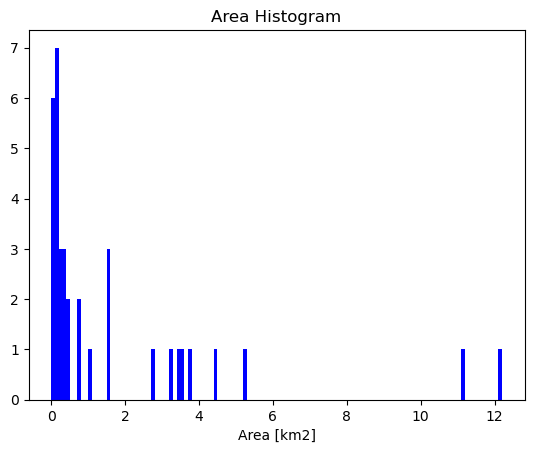

In [27]:
bins=np.arange(0, 12.3, 0.1)
plt.hist(dt_area['area'], bins=bins, color='blue' )
plt.xlabel('Area [km2]')
plt.title('Area Histogram')

In [28]:
dt.columns

Index(['ID', 'elev_min', 'elev_max', 'elev_mean', 'elev_std', 'year', 'type',
       'slope_min', 'slope_max', 'slope_mean', 'slope_std', 'strata_min',
       'strata_max', 'strata_mode', 'hazard_min', 'hazard_max', 'hazard_mean',
       'hazard_mode'],
      dtype='object')

In [29]:
sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

In [30]:
sum_area

year  type
2005  0        5.269303
      1        1.035819
      2       11.171487
      3        4.470610
      4        0.754158
      5        2.797287
      6        3.517374
      7       12.129163
2010  0        0.191383
      2        3.251412
      3        0.395053
      4        0.434593
      5        0.307537
      6        0.134538
      7        3.428093
2015  0        0.087641
      2        1.549119
      3        0.396111
      4        0.429030
      5        0.100365
      6        0.118912
      7        1.592758
2020  0        0.049242
      2        0.736669
      3        0.119352
      4        0.085819
      5        0.296377
      6        0.298639
      7        3.746461
2023  0        0.002932
      2        0.190673
      3        0.089981
      4        0.080513
      5        0.240616
      6        0.111856
      7        1.540895
Name: area, dtype: float64

#### FIGURES

In [31]:
#area_palette = ["#FFFFD9", "#D9F0B2", "#71C8BD", "#06AEAA", "#197C9B", "#244BA1", "#0C2B82", "#081D58"]
area_palette = ["#FFFFD9", "#D9F0B2", "#70DAC8", "#71C8BD", "#06AEAA", "#197C9B", "#07546F", "#0F3C73", "#0A2570", "#1E0563", "#350351", "#31043A"]  
#custom_cmap = plt.cm.get_cmap(area_palette)
custom_cmap = mcolors.LinearSegmentedColormap.from_list("custom_cmap", area_palette)

##### SLOPE VS. BUILDING TYPE PERIOD BY PERIOD (2005-2023)

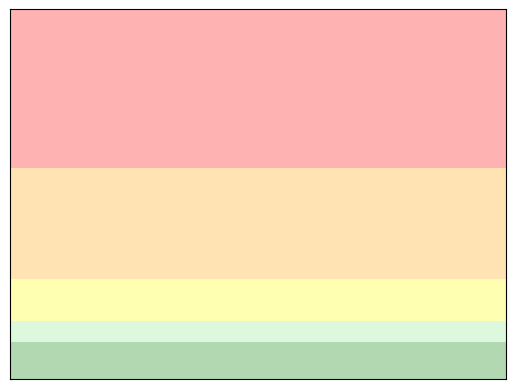

In [33]:
## SLOPE CUTS FROM SERVICIO GEOLÓGICO COLOMBIANO

fig, ax = plt.subplots()

slope_cuts = [0, 7, 11, 19, 40]
division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']

for i, (y_value, color) in enumerate(zip(slope_cuts, colors)):
    #ax.axhline(y_value, color='black', linestyle='--', linewidth=0.8, alpha=0.3)
    ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.3)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])
ax.set_ylim(0, 70)

# Show the plot
plt.show()

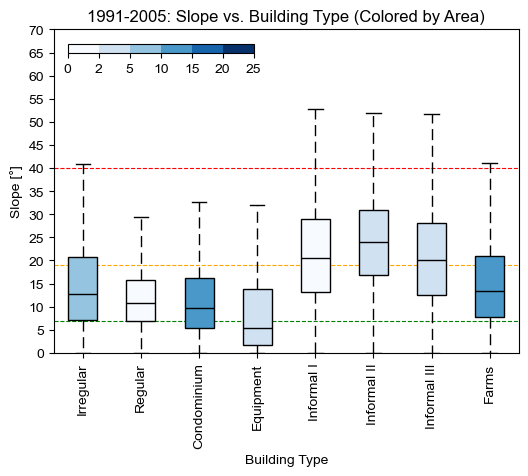

In [61]:
## Slope vs. Building Type (Colored by Area)   ###2005

slope_cuts = [0, 7, 11, 19, 40]
division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'lightgreen', 'yellow', 'orange', 'red']
slope_categories=['Slightly inclined', 'Inclined', 'Very inclined', 'Abrupt', 'Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])


sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt_05['type'].unique():
    a = dt_05[dt_05['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(round(sum_area[2005][building_type], 2))


# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 6))


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])




boxplot = plt.boxplot(plot_data, patch_artist=True)

# Assign colors to each box corresponding to the area range
area_palette = cm.Blues(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=2:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>2 and labels[i]<=5:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>5and labels[i]<=10:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>10 and labels[i]<=15:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>15 and labels[i]<=20:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])
        
#COLORBAR
colorbar_intervals = [0, 2, 5, 10, 15, 20, 25]
boundaries= [0, 2, 5, 10, 15, 20, 25]
cmap = mcolors.ListedColormap(area_palette, name='from_list', N=len(area_palette))
norm = mcolors.BoundaryNorm(colorbar_intervals, cmap.N, clip=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                    boundaries=boundaries, 
                    ticks=boundaries,  
                    shrink=0.4, 
                    anchor=(0.05,7.3), 
                    aspect = 20,
                    alpha=1)
cbar.ax.tick_params(axis='both', labelsize=10)
cbar.set_label('', size=10, ma='right')


# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building Type')
plt.ylabel('Slope [°]')
plt.title('1991-2005: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Regular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 9, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.ylim(0,70)

#customize the plot
for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))

plt.show()

In [140]:
labels

[5.27, 1.04, 11.17, 4.47, 0.75, 2.8, 3.52, 12.13]

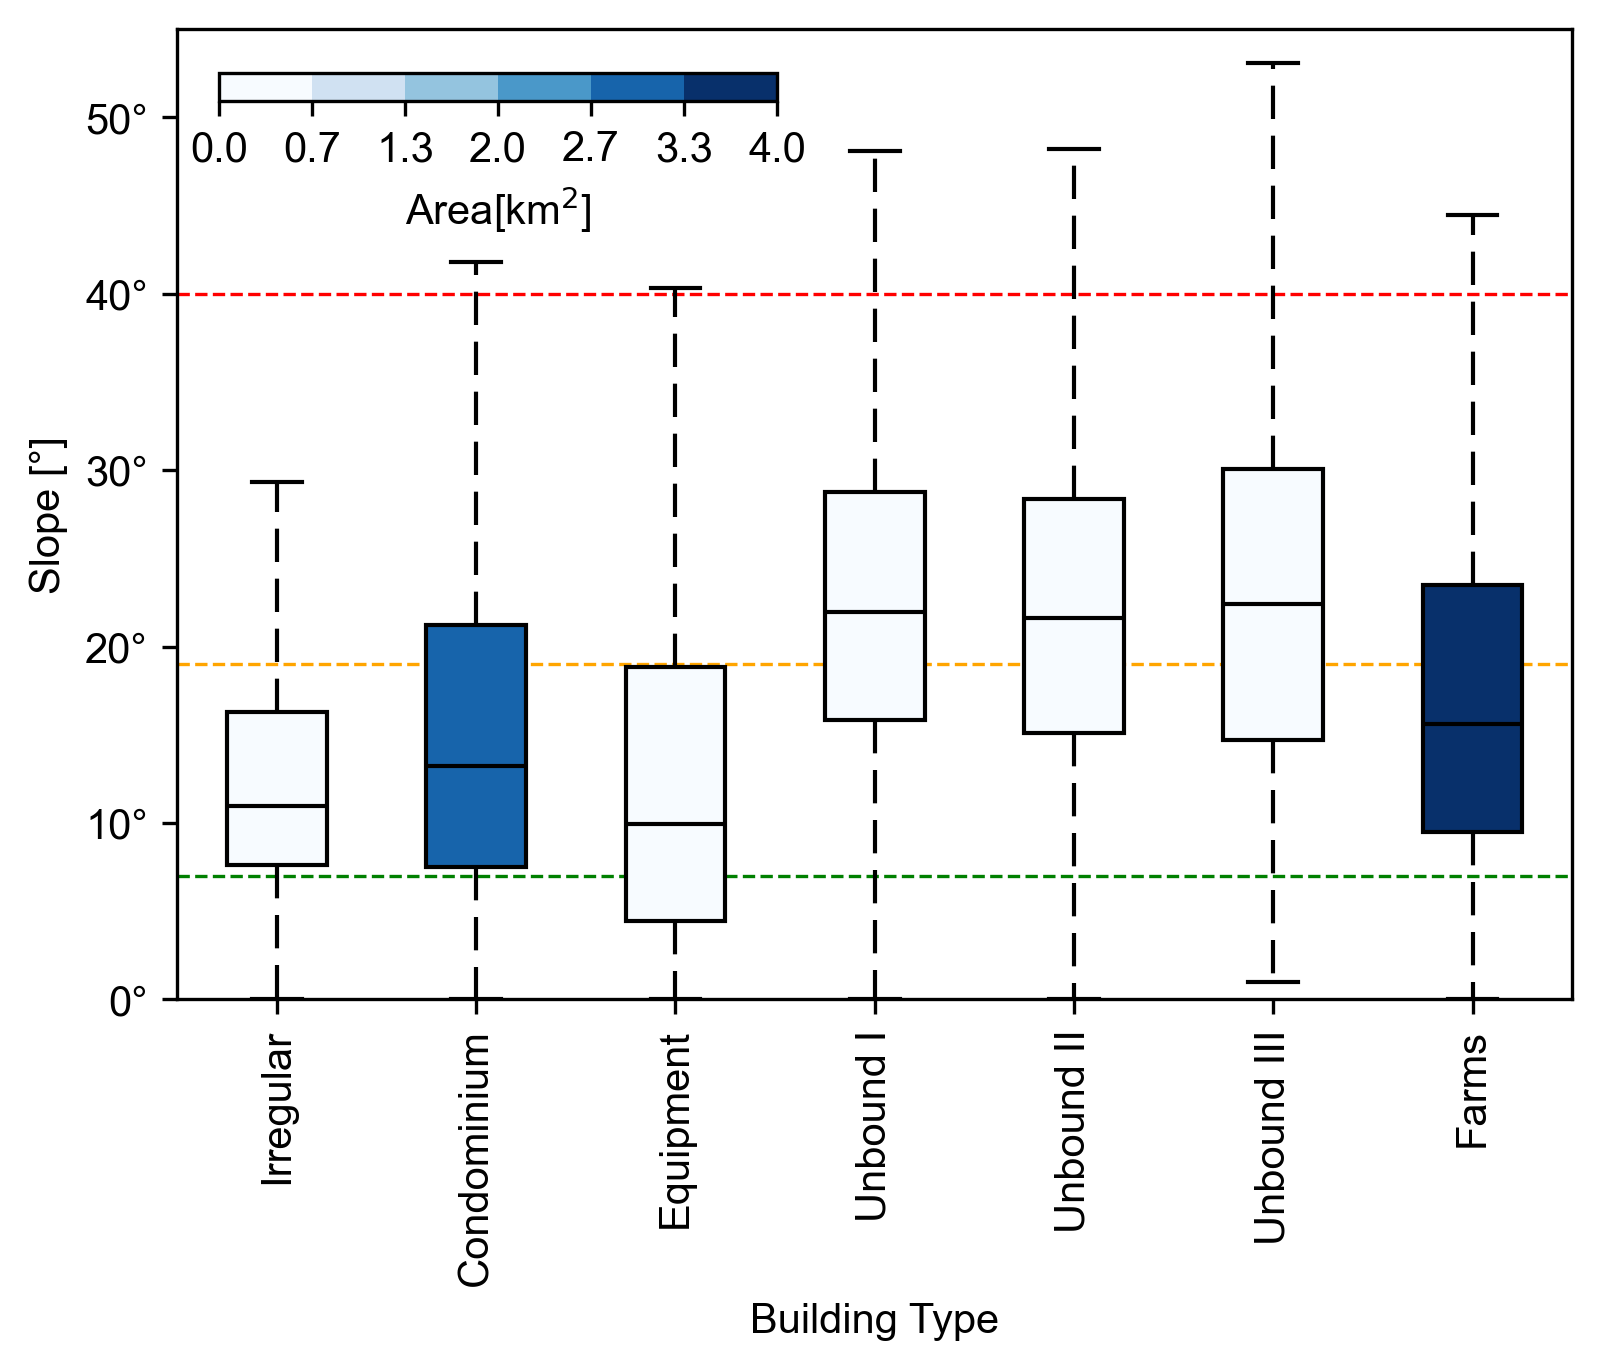

In [101]:
## Slope vs. Building Type (Colored by Area)   ###2010

sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt_10['type'].unique():
    a = dt_10[dt_10['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(round(sum_area[2010][building_type], 2))

# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 6), dpi=300)


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])




boxplot = plt.boxplot(plot_data, patch_artist=True)

# Assign colors to each box corresponding to the area range
area_palette = cm.Blues(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=0.7:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>0.7 and labels[i]<=1.3:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>1.3and labels[i]<=2:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>2 and labels[i]<=2.7:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>2.7 and labels[i]<=3.3:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])
        
#COLORBAR
colorbar_intervals = [0, 0.7, 1.3, 2, 2.7, 3.3, 4]
boundaries= [0, 0.7, 1.3, 2, 2.7, 3.3, 4]
cmap = mcolors.ListedColormap(area_palette, name='from_list', N=len(area_palette))
norm = mcolors.BoundaryNorm(colorbar_intervals, cmap.N, clip=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                    boundaries=boundaries, 
                    ticks=boundaries,  
                    shrink=0.4, 
                    anchor=(0.05,7.3), 
                    aspect = 20,
                    alpha=1)
cbar.ax.tick_params(axis='both', labelsize=10)
cbar.set_label('Area[km$^2$]', size=10, ma='right')


# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building Type')
plt.ylabel('Slope [°]')
#plt.title('2005-2010: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Condominium', 'Equipment', 'Unbound I', 'Unbound II', 'Unbound III', 'Farms']
loc_xtype=np.arange(1, 8, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.yticks(np.arange(0, 50 + 1, 10), ['0°', '10°', '20°', '30°', '40°', '50°'])
plt.ylim(0,55)

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))
plt.savefig("slopevstype_05.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [142]:
labels

[0.19, 3.25, 0.4, 0.43, 0.31, 0.13, 3.43]

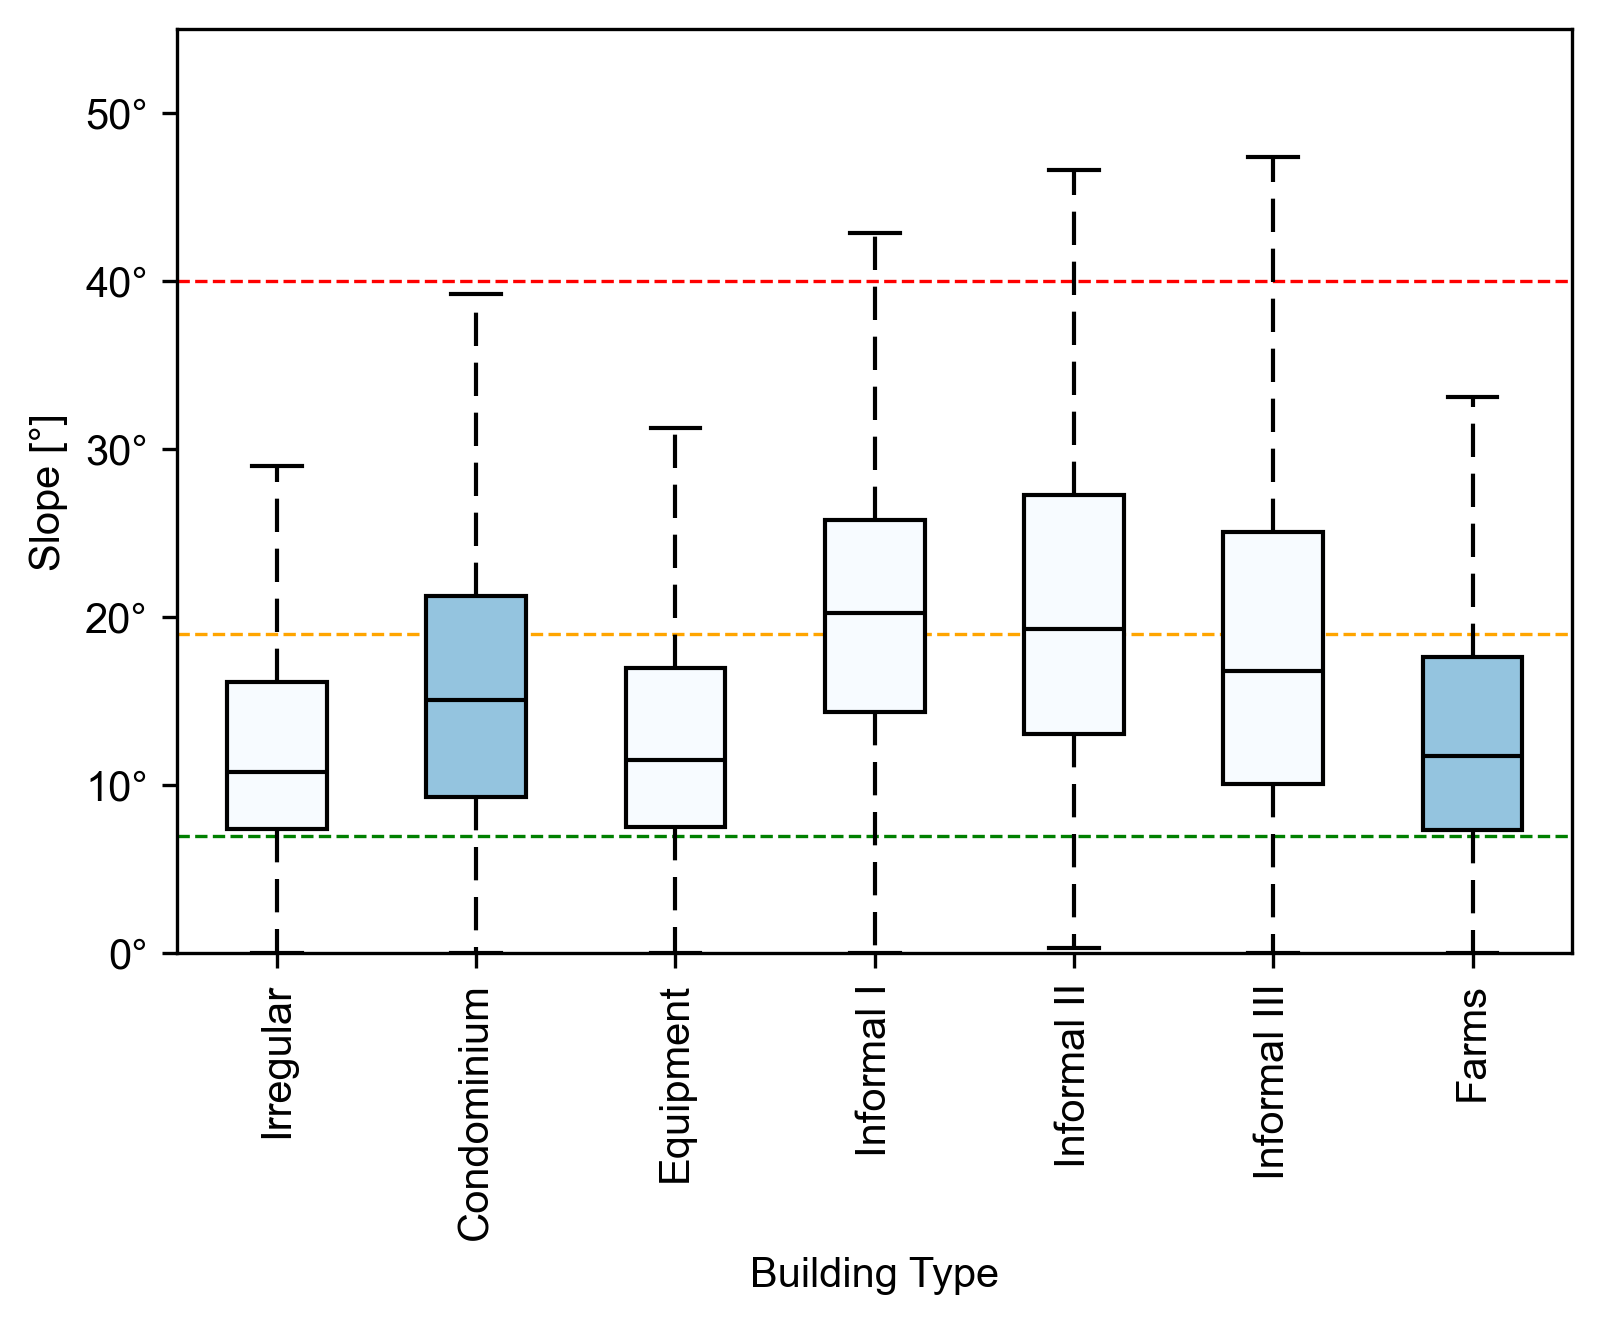

In [70]:
## Slope vs. Building Type (Colored by Area)   ###2015

sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt_15['type'].unique():
    a = dt_15[dt_15['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(round(sum_area[2015][building_type], 2))

# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])




boxplot = plt.boxplot(plot_data, patch_artist=True)

area_palette = cm.Blues(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=0.7:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>0.7 and labels[i]<=1.3:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>1.3and labels[i]<=2:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>2 and labels[i]<=2.7:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>2.7 and labels[i]<=3.3:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])
    


# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building Type')
plt.ylabel('Slope [°]')
#plt.title('2010-2015: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 8, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.yticks(np.arange(0, 50 + 1, 10), ['0°', '10°', '20°', '30°', '40°', '50°'])
plt.ylim(0,55)

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))
plt.savefig("slopevstype_10.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [144]:
labels

[0.09, 1.55, 0.4, 0.43, 0.1, 0.12, 1.59]

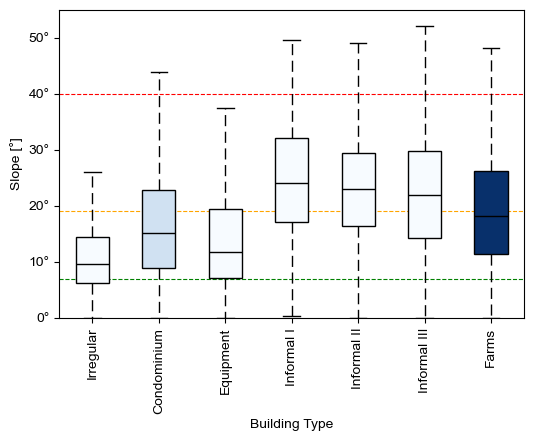

In [69]:
## Slope vs. Building Type (Colored by Area)   ###2020
sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt_20['type'].unique():
    a = dt_20[dt_20['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(round(sum_area[2020][building_type], 2))

# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 4))


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])




boxplot = plt.boxplot(plot_data, patch_artist=True)

# Assign colors to each box corresponding to the area range
area_palette = cm.Blues(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=0.7:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>0.7 and labels[i]<=1.3:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>1.3and labels[i]<=2:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>2 and labels[i]<=2.7:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>2.7 and labels[i]<=3.3:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])
        


# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building Type')
plt.ylabel('Slope [°]')
#plt.title('2015-2020: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 8, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.yticks(np.arange(0, 50 + 1, 10), ['0°', '10°', '20°', '30°', '40°', '50°'])
plt.ylim(0,55)

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))
plt.savefig("slopevstype_15.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [146]:
labels

[0.05, 0.74, 0.12, 0.09, 0.3, 0.3, 3.75]

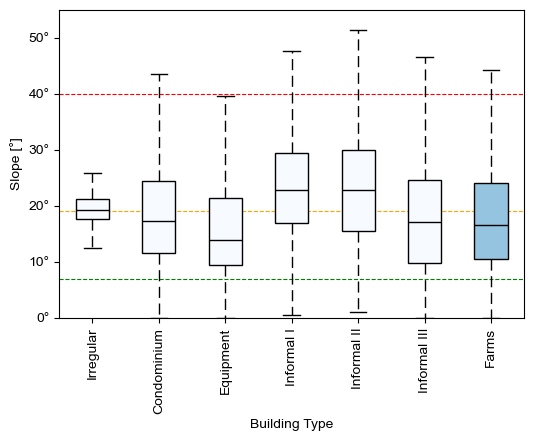

In [68]:
## Slope vs. Building Type (Colored by Area)   ###2023
sum_area = dt_area.groupby(['year', 'type'])['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt_23['type'].unique():
    a = dt_23[dt_23['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(round(sum_area[2023][building_type], 2))

# Create the boxplot
fig, ax = plt.subplots(figsize=(6, 4))


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])


boxplot = plt.boxplot(plot_data, patch_artist=True)

# Assign colors to each box corresponding to the area range
area_palette = cm.Blues(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<=0.7:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>0.7 and labels[i]<=1.3:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>1.3and labels[i]<=2:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>2 and labels[i]<=2.7:
        patch.set_facecolor(area_palette[3])
    elif labels[i]>2.7 and labels[i]<=3.3:
        patch.set_facecolor(area_palette[4])
    else:
        patch.set_facecolor(area_palette[5])
        


# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building Type')
plt.ylabel('Slope [°]')
#plt.title('2020-2023: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 8, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.yticks(np.arange(0, 50 + 1, 10), ['0°', '10°', '20°', '30°', '40°', '50°'])
plt.ylim(0,55)

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))
plt.savefig("slopevstype_20.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [148]:
labels

[0.0, 0.19, 0.09, 0.08, 0.24, 0.11, 1.54]

In [149]:
sum_area

year  type
2005  0        5.269303
      1        1.035819
      2       11.171487
      3        4.470610
      4        0.754158
      5        2.797287
      6        3.517374
      7       12.129163
2010  0        0.191383
      2        3.251412
      3        0.395053
      4        0.434593
      5        0.307537
      6        0.134538
      7        3.428093
2015  0        0.087641
      2        1.549119
      3        0.396111
      4        0.429030
      5        0.100365
      6        0.118912
      7        1.592758
2020  0        0.049242
      2        0.736669
      3        0.119352
      4        0.085819
      5        0.296377
      6        0.298639
      7        3.746461
2023  0        0.002932
      2        0.190673
      3        0.089981
      4        0.080513
      5        0.240616
      6        0.111856
      7        1.540895
Name: area, dtype: float64

##### SLOPE VS. BUILDING TYPE ALL YEARS

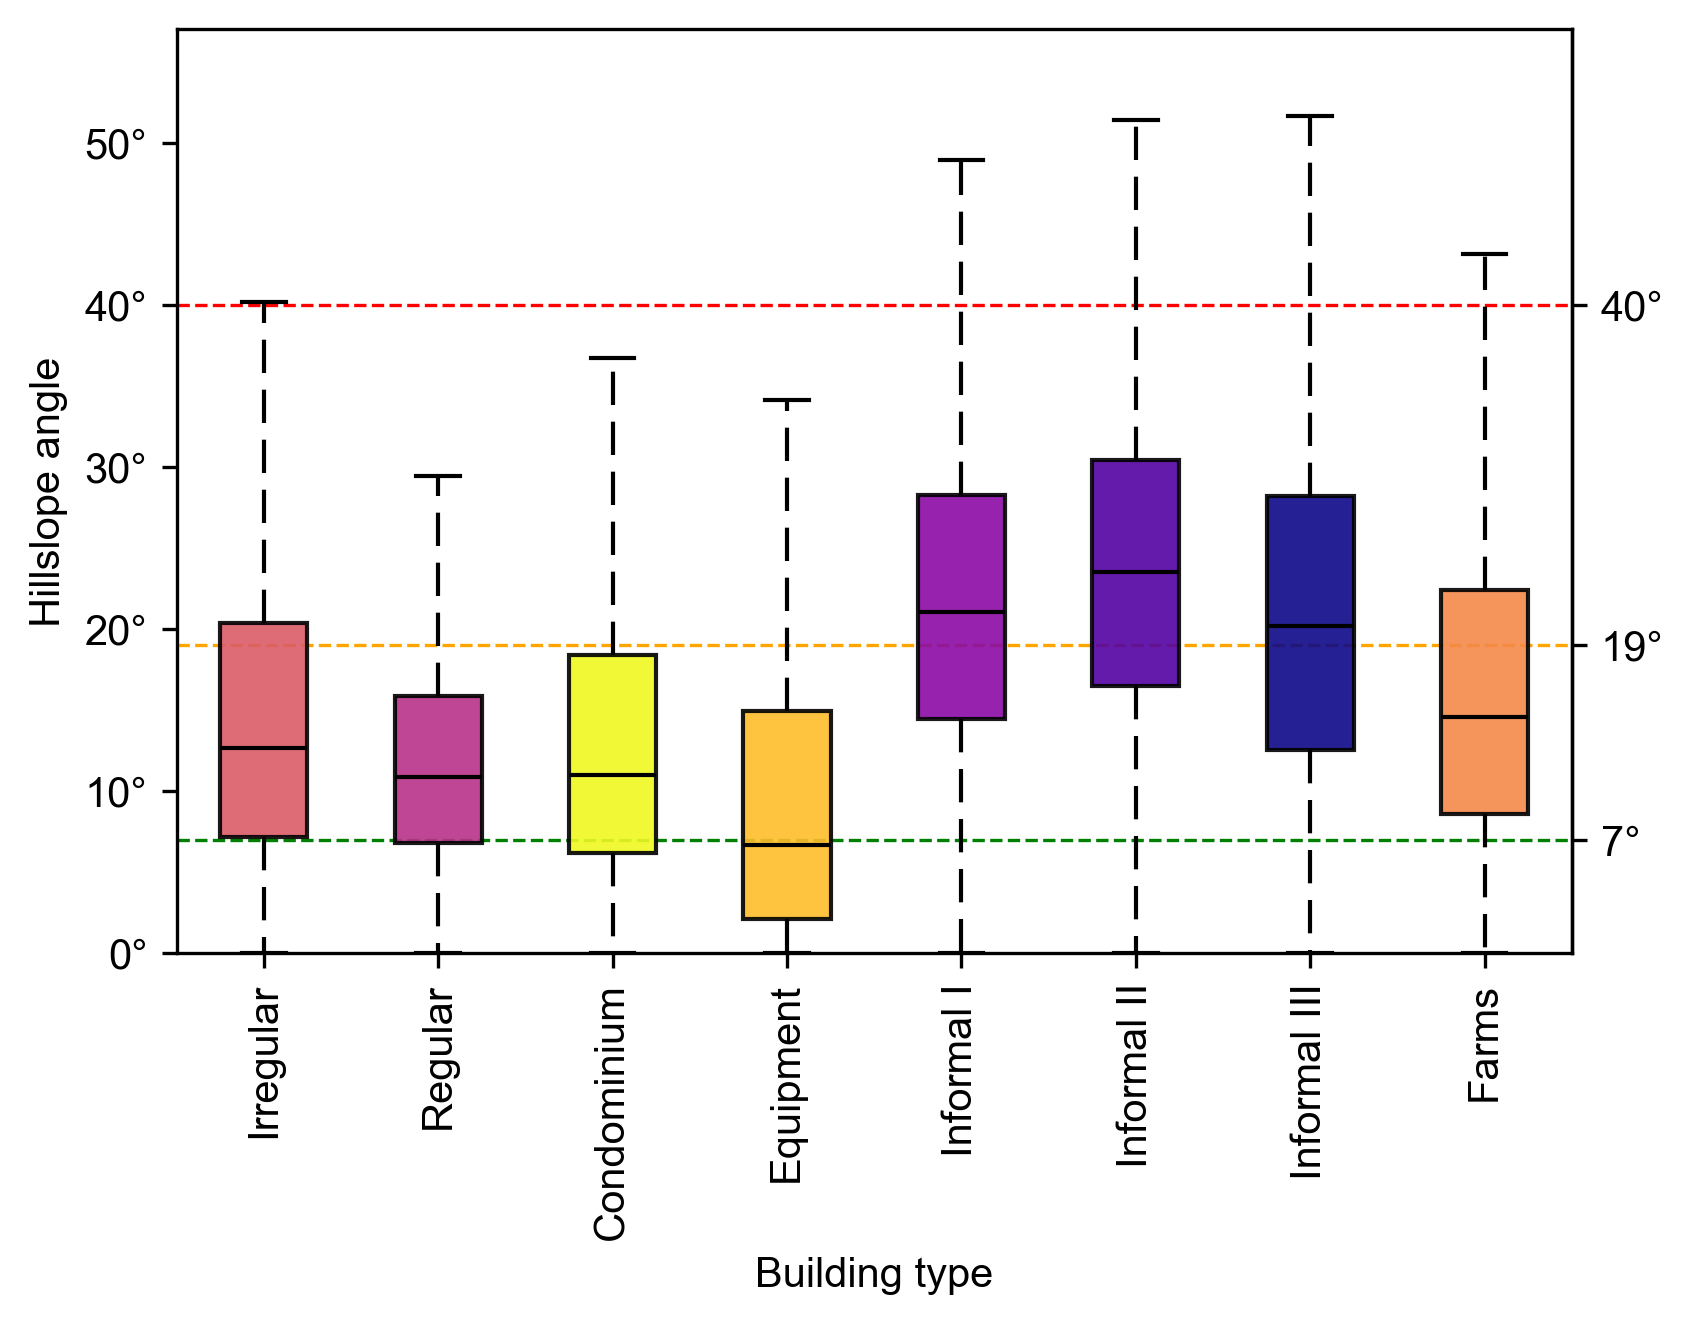

In [100]:
## Slope vs. Building

mpl.rcParams['font.family'] = 'Arial'

fig, ax = plt.subplots(figsize=(6, 4), dpi=300)


slope_cuts =  [7, 19, 40]
#division_heights = [7, 4, 8, 21, 30]
colors = ['green', 'orange', 'red']
slope_categories=['0-7: Slightly inclined', '7-11: Inclined', '11-19: Very inclined', '19-40: Abrupt', '40-90: Steep']

for i, (y_value, color, slope_cat) in enumerate(zip(slope_cuts, colors, slope_categories)):
    ax.axhline(y_value, color=color, linestyle='--', linewidth=0.8, label=slope_cat)
    #ax.axhspan(y_value, y_value + division_heights[i], facecolor=color, alpha=0.1)


ax.yaxis.set_ticks([])
ax.xaxis.set_ticks([])

#plt.legend(title='Slope thresholds', bbox_to_anchor=(1, 1), fontsize='small')


sum_area = dt_area.groupby('type')['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt['type'].unique():
    a = dt[dt['type'] == building_type]['slope_mean']
    a = a.dropna()
    plot_data.append(a)
    labels.append(sum_area[building_type])

# Create the boxplot
boxplot = ax.boxplot(plot_data, patch_artist=True)

# Assign colors to each box 
color_palette = cm.plasma_r(np.linspace(0, 1, 8))

# Define your preferred order
preferred_order = [3, 4, 0, 1, 5, 6, 7, 2]  # Adjust the indices to your preference

# Reorder the colors based on your preferred order
reordered_colors = [color_palette[i] for i in preferred_order]

for patch, color in zip(boxplot['boxes'], reordered_colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.9)

#for i, patch in enumerate(boxplot['boxes']):
#    if labels[i]<=2:
#        patch.set_facecolor(area_palette[0])
#    elif labels[i]>2 and labels[i]<=5:
#        patch.set_facecolor(area_palette[1])
#    elif labels[i]>5and labels[i]<=10:
#        patch.set_facecolor(area_palette[2])
#    elif labels[i]>10 and labels[i]<=15:
#        patch.set_facecolor(area_palette[3])
#    elif labels[i]>15 and labels[i]<=20:
#        patch.set_facecolor(area_palette[4])
#    else:
#        patch.set_facecolor(area_palette[5])

#cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
#                    boundaries=boundaries, 
#                    ticks=boundaries,  
#                    shrink=0.4, 
#                    anchor=(0.05,7.3), 
#                    aspect = 20,
#                    alpha=1)
#cbar.ax.tick_params(axis='both', labelsize=10)
#cbar.set_label('Growth area [km$^2$]', labelpad=1, size=10, fontname="Arial")

# Set the labels and title
plt.yticks(np.arange(0, 70 + 1, 5))
plt.xlabel('Building type')
plt.ylabel('Hillslope angle')
#plt.title('1991-2023: Slope vs. Building Type (Colored by Area)')
typ=['Irregular', 'Regular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 9, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.yticks(np.arange(0, 50 + 1, 10), ['0°', '10°', '20°', '30°', '40°', '50°'])
plt.ylim(0,57)

# Add the second y-axis
secay = ax.secondary_yaxis('right')
secay.set_yticks(slope_cuts)
secay.set_yticklabels(['7°', '19°', '40°']) 

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))


plt.savefig("Fig04b_FV.pdf", dpi=300, bbox_inches='tight')
plt.show()


In [59]:
sum_area

type
0     5.600500
1     1.035819
2    16.899360
3     5.471107
4     1.784112
5     3.742181
6     4.181318
7    22.437370
Name: area, dtype: float64

In [153]:
dt.year = dt.year.astype(int)

In [154]:
dts=[dt_10, dt_15, dt_20, dt_23]
periods = ['2005-2010', '2010-2015', '2015-2020', '2020-2023']

In [157]:
dt_05

,ID,elev_min,elev_max,elev_mean,elev_std,year,type,slope_min,slope_max,slope_mean,slope_std,strata_min,strata_max,strata_mode,hazard_min,hazard_max,hazard_mean,hazard_mode
0,1,1562.739990,1587.400024,1576.374558,5.513735,2005,0,4.108963,40.410168,18.132472,9.286643,2.0,3.0,3.0,2.0,2.0,2.0,2.0
1,2,1563.709961,1581.479980,1573.708997,5.468528,2005,0,5.172004,31.888172,19.099157,9.980720,2.0,3.0,3.0,2.0,2.0,2.0,2.0
2,3,1564.900024,1579.900024,1574.156670,4.908079,2005,0,3.867337,32.715496,18.421413,10.894248,2.0,3.0,3.0,2.0,2.0,2.0,2.0
3,4,1563.619995,1579.260010,1573.688883,5.271804,2005,0,3.629250,33.640568,18.481216,11.586589,3.0,3.0,3.0,2.0,2.0,2.0,2.0
4,5,1576.300049,1589.439941,1584.661885,3.824182,2005,0,7.075419,29.549379,17.631047,7.334118,3.0,3.0,3.0,2.0,2.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606291,469836,1919.890015,1919.890015,1919.890015,0.000000,2005,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1606292,469837,1918.010010,1918.010010,1918.010010,0.000000,2005,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1606293,469838,1915.390015,1915.390015,1915.390015,0.000000,2005,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1606294,469839,1925.760010,1927.130005,1926.460002,0.559700,2005,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


##### STRATA VS BUILDING TYPE ALL YEARS

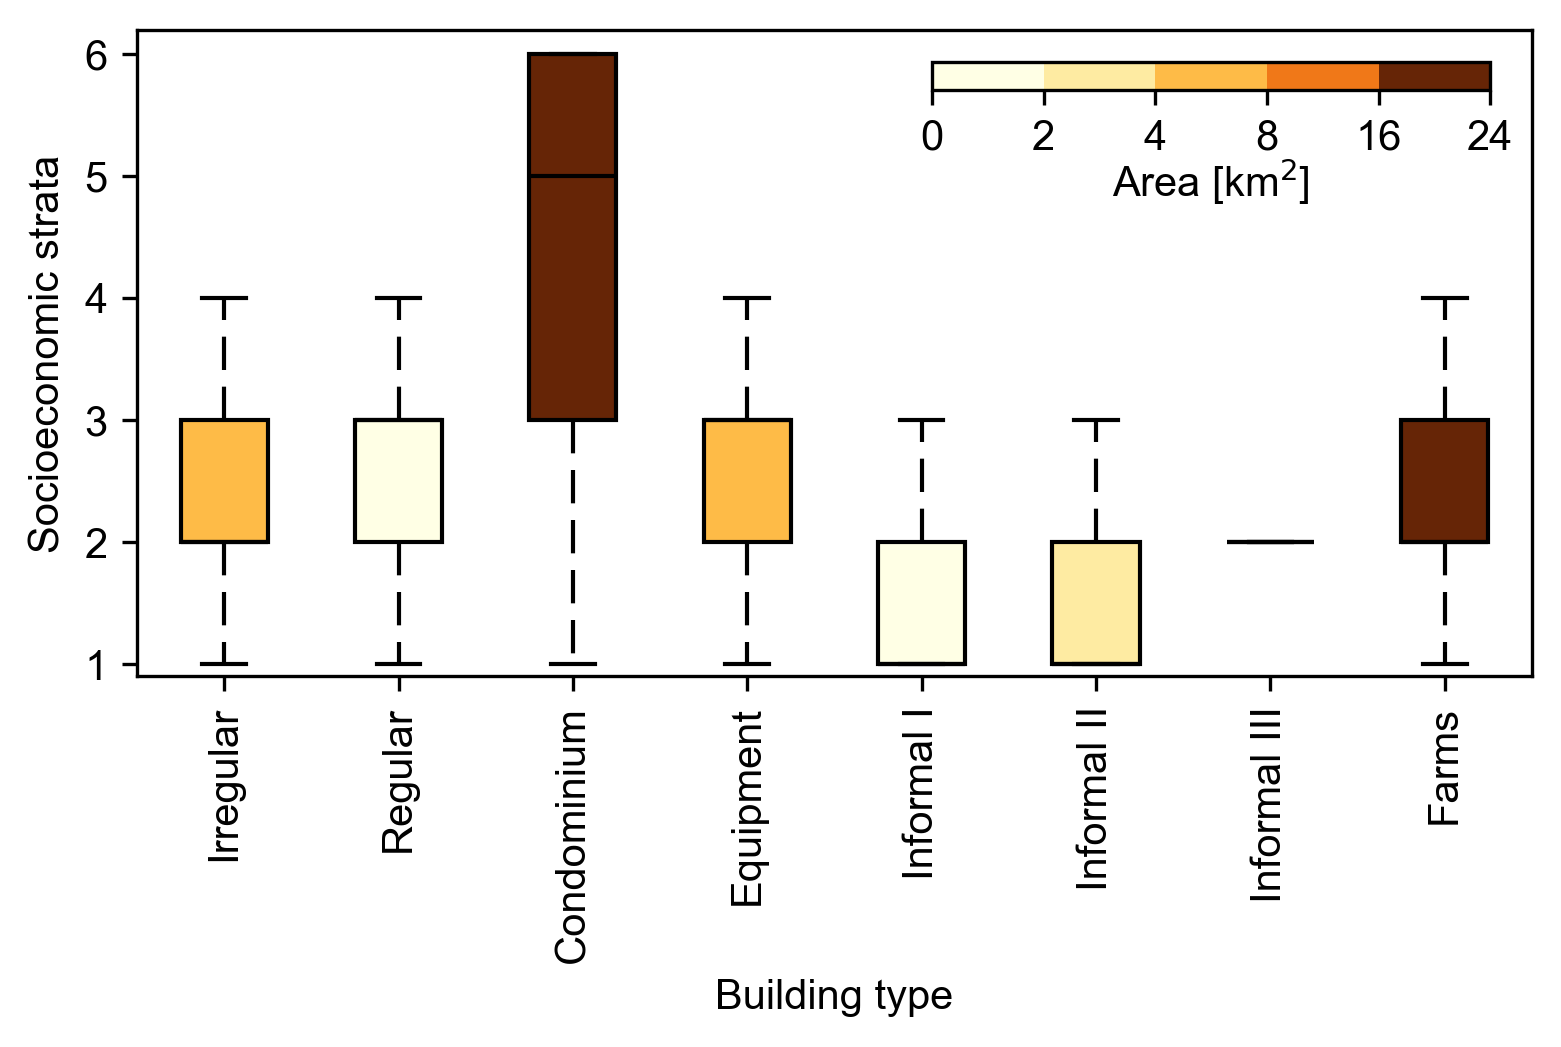

In [114]:
## Strata vs. Building Type (Colored by Area)   ###ALL YEARS
fig, ax = plt.subplots(figsize=(6, 4), dpi=300)

mpl.rcParams['font.family'] = 'Arial'

sum_area = dt_area.groupby('type')['area'].sum()

# Prepare data for plotting
plot_data = []
labels = []
for building_type in dt['type'].unique():
    a = dt[dt['type'] == building_type]['strata_mode']
    a = a.dropna()
    plot_data.append(a)
    labels.append(sum_area[building_type])

# Create the boxplot

boxplot = ax.boxplot(plot_data, patch_artist=True)

# Assign colors to each box corresp onding to the area range
area_palette = cm.YlOrBr(np.linspace(0, 1, 6))

for i, patch in enumerate(boxplot['boxes']):
    if labels[i]<2:
        patch.set_facecolor(area_palette[0])
    elif labels[i]>=2 and labels[i]<4:
        patch.set_facecolor(area_palette[1])
    elif labels[i]>=4and labels[i]<8:
        patch.set_facecolor(area_palette[2])
    elif labels[i]>=8 and labels[i]<16:
        patch.set_facecolor(area_palette[3])
    else:
        patch.set_facecolor(area_palette[5])
    

        
#COLORBAR
colorbar_intervals = [0, 2, 4, 8, 16, 24]
boundaries= [0, 2, 4, 8, 16, 24]
cmap = mcolors.ListedColormap(area_palette, name='from_list', N=len(area_palette))
norm = mcolors.BoundaryNorm(colorbar_intervals, cmap.N, clip=True)
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='horizontal', 
                    boundaries=boundaries, 
                    ticks=boundaries, 
                    shrink=0.4, 
                    anchor=(0.95,7.8), 
                    aspect = 20,
                    alpha=1)
cbar.ax.tick_params(axis='both', labelsize=10)
cbar.set_label('Area [km$^2$]', labelpad=0, size=10)


# Set the labels and title
plt.xlabel('Building type')
plt.ylabel('Socioeconomic strata')
#ax.set_title('2005-2023: Strata vs. Building Type (Colored by Area)')
typ=['Irregular', 'Regular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 9, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.ylim(0.9,6.2)

for flier in boxplot['fliers']:
    flier.set_markersize(0) 

for median in boxplot['medians']:
    median.set_color('k')
    
for whisker in boxplot['whiskers']:
    whisker.set_linestyle('--')
    whisker.set_dashes((8, 4))

plt.savefig("FigA16_FV.pdf", dpi=300, bbox_inches='tight')
plt.show()

In [51]:
labels

[5.600500346,
 1.035819,
 16.899360225000002,
 5.471107436,
 1.784111838,
 3.7421811799999998,
 4.181318027,
 22.437370103]

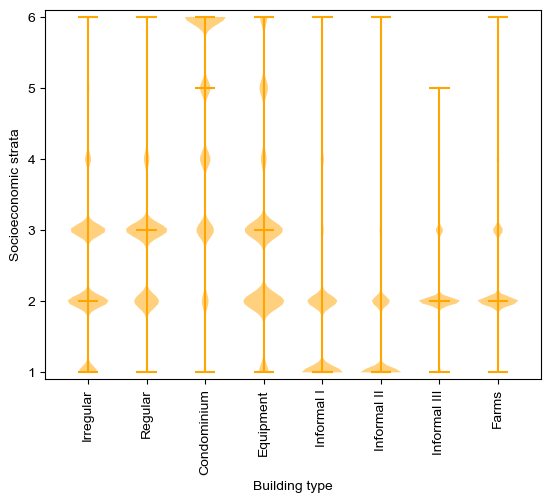

In [113]:
plot_data = []
labels = []
for building_type in dt['type'].unique():
    a = dt[dt['type'] == building_type]['strata_mode']
    a = a.dropna()
    plot_data.append(a)
    labels.append(sum_area[building_type])
    

colormap = cm.YlOrBr
fig, ax = plt.subplots()
violin = ax.violinplot(plot_data, showmedians=True, widths=0.7)

for i, body in enumerate(violin['bodies']):
    body.set_facecolor('orange')
#    body.set_edgecolor('black')
    body.set_alpha(0.5)
    
violin['cmedians'].set_color('orange')
violin['cbars'].set_color('orange')
violin['cmaxes'].set_color('orange')
violin['cmins'].set_color('orange')



plt.xlabel('Building type')
plt.ylabel('Socioeconomic strata')
#plt.title('2005-2023: Strata vs. Building Type')
typ=['Irregular', 'Regular', 'Condominium', 'Equipment', 'Informal I', 'Informal II', 'Informal III', 'Farms']
loc_xtype=np.arange(1, 9, 1)
plt.xticks(loc_xtype, typ, rotation=90)
plt.ylim(0.9,6.1)

plt.savefig("FigA17_FV.pdf", dpi=300, bbox_inches='tight')
plt.show()